# Description: Sentiment Analysis program that parses Balder's Gate 3 comments from Gameranx Youtube using Python.

## Import Packages

In [3]:
# Import api aclient discovery
from apiclient.discovery import build

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import rcPrams, seaborn and matplotlib for viz
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Import nltk and VADER sentiment analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

## Call YouTube API

In [5]:
# Replace with your actual API key
api_key = "xxxx"

# Build YouTube API client
youtube = build('youtube', 'v3', developerKey=api_key)

# Replace with your YouTube video ID
ID = "GhUXwcYqLdg"

## Scrape Comments & Assign/Calculate Sentiment 

In [6]:
box = [] # Initialize an empty list to store data

# Define a function to scrape comments with replies
def scrape_comments_with_replies():
    # Retrieve initial set of comments from the YouTube video
    data = youtube.commentThreads().list(part='snippet', videoId=ID, maxResults='100', textFormat="plainText").execute()

    # Loop through each comment in the initial set
    for i in data["items"]:
        comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
        published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']

        # Apply VADER sentiment analysis to the comment
        sentiment_scores = sia.polarity_scores(comment)
        sentiment_polarity = sentiment_scores['compound']
        
        # Categorize sentiment based on polarity
        if sentiment_polarity > 0.05:
            sentiment_category = "Positive"
        elif sentiment_polarity < -0.05:
            sentiment_category = "Negative"
        else:
            sentiment_category = "Neutral"
        
        # Append comment data to the 'box' list
        box.append([comment, published_at, sentiment_polarity, sentiment_category])

        totalReplyCount = i["snippet"]['totalReplyCount']

        # If there are replies to the comment, retrieve and process them
        if totalReplyCount > 0:
            parent = i["snippet"]['topLevelComment']["id"]

            # Retrieve replies to the comment
            data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                            textFormat="plainText").execute()
            
            # Loop through each reply to the comment
            for i in data2["items"]:
                comment = i["snippet"]["textDisplay"]
                published_at = i["snippet"]['publishedAt']

                # Apply VADER sentiment analysis to the reply comment
                sentiment_scores = sia.polarity_scores(comment)
                sentiment_polarity = sentiment_scores['compound']
                
                # Categorize sentiment based on polarity
                if sentiment_polarity > 0.05:
                    sentiment_category = "Positive"
                elif sentiment_polarity < -0.05:
                    sentiment_category = "Negative"
                else:
                    sentiment_category = "Neutral"
                
                # Append reply comment data to the 'box' list
                box.append([comment, published_at, sentiment_polarity, sentiment_category])

    # If there are more pages of comments, continue retrieving and processing
    while ("nextPageToken" in data):
        data = youtube.commentThreads().list(part='snippet', videoId=ID, pageToken=data["nextPageToken"],
                                             maxResults='100', textFormat="plainText").execute()

        # Loop through each comment in the next page
        for i in data["items"]:
            comment = i["snippet"]['topLevelComment']["snippet"]["textDisplay"]
            published_at = i["snippet"]['topLevelComment']["snippet"]['publishedAt']

            # Apply VADER sentiment analysis to the comment
            sentiment_scores = sia.polarity_scores(comment)
            sentiment_polarity = sentiment_scores['compound']
            
            # Categorize sentiment based on polarity
            if sentiment_polarity > 0.05:
                sentiment_category = "Positive"
            elif sentiment_polarity < -0.05:
                sentiment_category = "Negative"
            else:
                sentiment_category = "Neutral"
            
            # Append comment data to the 'box' list
            box.append([comment, published_at, sentiment_polarity, sentiment_category])

            totalReplyCount = i["snippet"]['totalReplyCount']

            # If there are replies to the comment, retrieve and process them        
            if totalReplyCount > 0:
                parent = i["snippet"]['topLevelComment']["id"]

                # Retrieve replies to the comment
                data2 = youtube.comments().list(part='snippet', maxResults='100', parentId=parent,
                                                textFormat="plainText").execute()

                # Loop through each reply to the comment
                for i in data2["items"]:
                    comment = i["snippet"]["textDisplay"]
                    published_at = i["snippet"]['publishedAt']

                    # Apply VADER sentiment analysis to the reply comment
                    sentiment_scores = sia.polarity_scores(comment)
                    sentiment_polarity = sentiment_scores['compound']
                    
                    # Categorize sentiment based on polarity
                    if sentiment_polarity > 0.05:
                        sentiment_category = "Positive"
                    elif sentiment_polarity < -0.05:
                        sentiment_category = "Negative"
                    else:
                        sentiment_category = "Neutral"
                    
                    # Append reply comment data to the 'box' list
                    box.append([comment, published_at, sentiment_polarity, sentiment_category])

    # Create a DataFrame from the collected data in 'box'
    df = pd.DataFrame({'Comment': [i[0] for i in box],
                       'Time': [i[1] for i in box],
                       'Sentiment Polarity': [i[2] for i in box],
                       'Sentiment Category': [i[3] for i in box]})

    return df # Return the DataFrame containing cleaned and categorized comments

# Call the function to scrape, analyze, and categorize comments
analyzed_df = scrape_comments_with_replies()


## Display Dataframe & Clean Date Column

In [7]:
# Convert the 'Time' column to datetime format
analyzed_df['Time'] = pd.to_datetime(analyzed_df['Time'])

# Extract the date part (year, month, and day)
analyzed_df['Time'] = analyzed_df['Time'].dt.date

# Display the first ten rows of the analyzed DataFrame
analyzed_df.head(10)

,Comment,Time,Sentiment Polarity,Sentiment Category
0,Sounds like Larian has become the new (origina...,2023-08-12,0.6900,Positive
1,"And I thought, Pathfinder - Wrath of the Right...",2023-08-12,0.5726,Positive
2,I think you need to change your image on this ...,2023-08-12,0.5242,Positive
3,"I wouldn’t even play this game for free, much ...",2023-08-12,0.6908,Positive
4,┬─┬ノ( º _ ºノ)......,2023-08-12,0.0000,Neutral
5,To much yakking at the beginning. Lost interes...,2023-08-12,0.1779,Positive
6,Thought this was an first person game.. what a...,2023-08-12,0.0000,Neutral
7,Wait why not wait until you beat the game for ...,2023-08-12,0.0000,Neutral
8,Definitley getting this instead of diablo 4,2023-08-12,0.0000,Neutral
9,"I was all in until you said ""turn-based."". Har...",2023-08-12,-0.1027,Negative


## Analysis

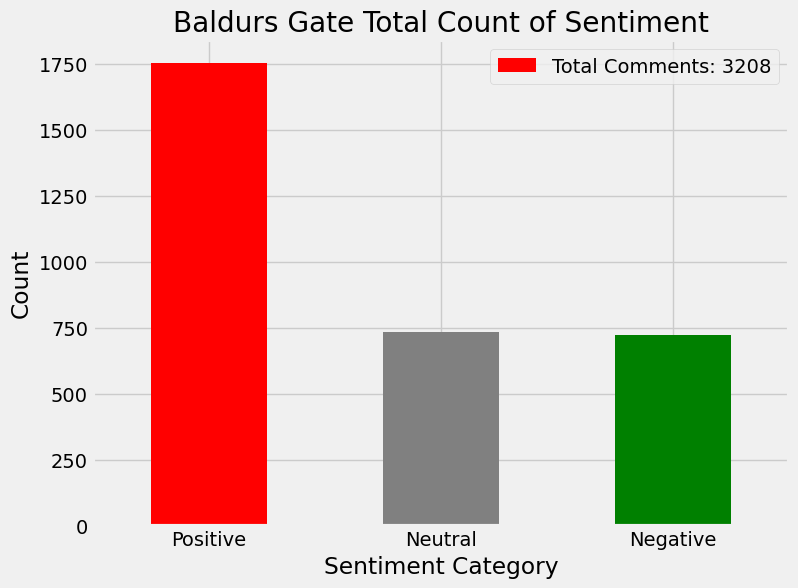

In [17]:
# Count the occurrences of each sentiment category
sentiment_counts = analyzed_df['Sentiment Category'].value_counts()
total_count = analyzed_df.shape[0]

# Plot a bar graph
plt.figure(figsize=(8, 6))
plt.grid(True)
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])

plt.title('Baldurs Gate Total Count of Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend([f'Total Comments: {total_count}'])
plt.show()

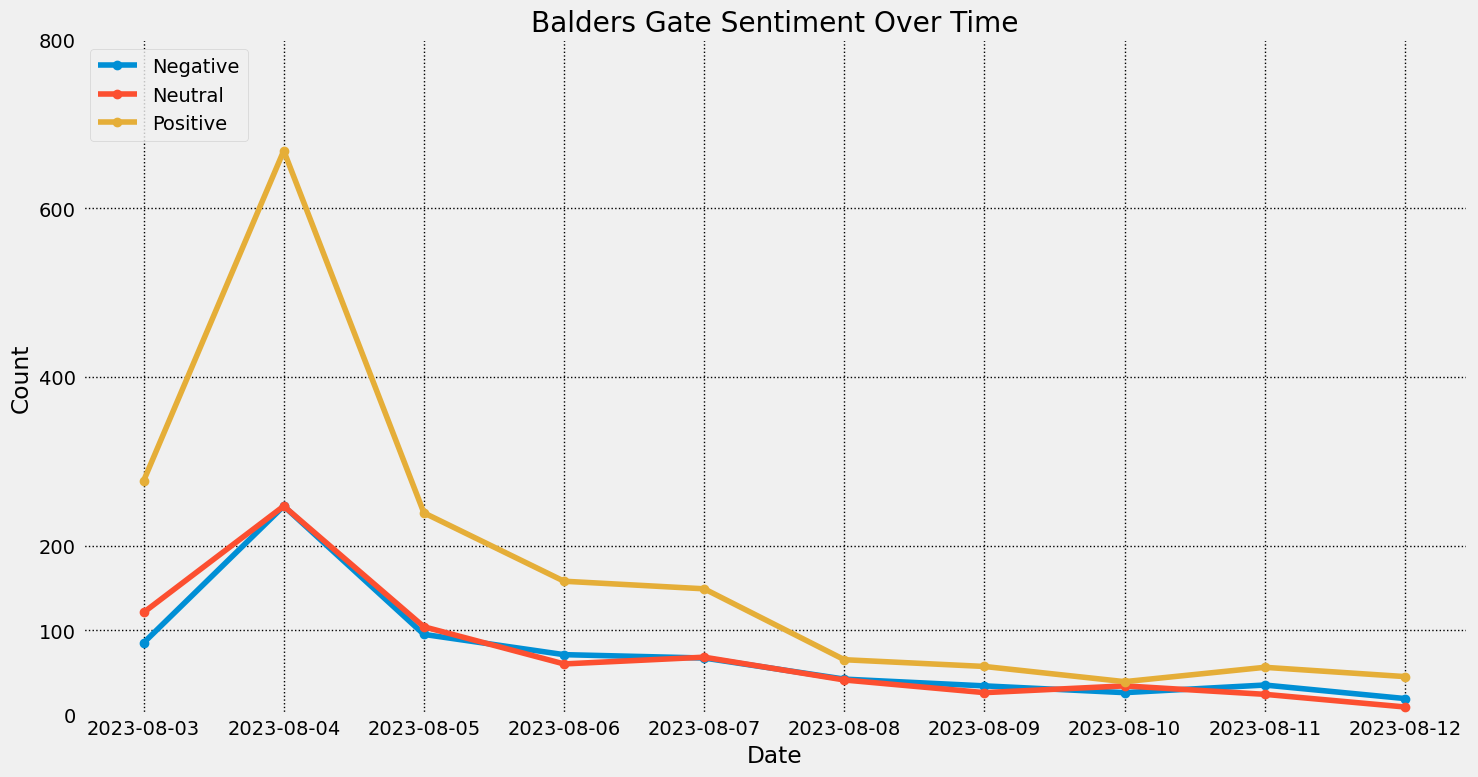

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Count the occurrences of each sentiment category per date
sentiment_counts = analyzed_df.groupby(['Time', 'Sentiment Category']).size().unstack()

rcParams['figure.figsize'] = 15, 8

# Plot the sentiment categories
sentiment_counts.plot(kind='line', marker='o')

plt.grid(True, color='k', linestyle=':')
plt.title("Balders Gate Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.ylim(0, 800)
plt.yticks([0, 100, 200, 400,600,800])
plt.style.use('fivethirtyeight')
plt.legend(loc=2)
plt.tight_layout()
plt.show()